# Predicción de abandono basado en RFM

In [1]:
# Importar librería para leer archivos
import os

# Agregar la ruta del del módulo modelos
import sys
sys.path.append('C:/Users/RJKANG/Desktop/modelos_cencosud/')

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Parametrización del Modelo de Abandono SMK
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Usuario y contraseña
# --------------------
user = 'rjkang'
password = '#Rjkang2023'

# ********************************************************************** #
# Parámetros del modelo de RFM que alimenta el modelo de abandono
# ********************************************************************** #

# Nombre del analista y fecha de ejecución
# ----------------------------------------
analista = "rjkang"

# Importar librería para obtener fecha actual
from datetime import datetime
from dateutil.relativedelta import relativedelta

ts_actualizacion = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Nombre del script input
# -----------------------
script_name = 'in_churn_smk.sql'

# Parámetros de segmentación
# --------------------------
# <nombre de cadena>
cadena =  'vea' # 'smk', 'jumbo', 'disco', 'vea', 'spid', jm'
# <nombre de region>
region = 'todas' # 'todas', 'buenos aires', ...
# <nombre de canal>
canal = 'online' # 'omnicanal', 'presencial, 'online'
# <numero de local>
nrolocal =  'todos' # 'todos', '35-Uriburu', '3-Camacua', ...
# Argumentos para conectar con el DataLake
tipo_cliente = 'todos' # 'todos', 'prime', 'grandes socios'

# ********************************************************************** #
# Parámetros de entrenamiento, predicción y definición de abandono
# ********************************************************************** #

# Fechas de predicción
# --------------------

# Fechas de predicción (performance)
date_start_performance = '2023-07-01'
date_end_performance = '2024-06-30'

# Convertir las fechas a objetos datetime
date_start_train_dt = datetime.strptime(date_start_performance, '%Y-%m-%d') - relativedelta(months=1)
date_end_train_dt = date_start_train_dt + relativedelta(years=1) - relativedelta(days=1)

# Convertir las fechas a formato de cadena
date_start_train = date_start_train_dt.strftime('%Y-%m-%d')
date_end_train = date_end_train_dt.strftime('%Y-%m-%d')

# Umbral de abandono
churn_threshold = 0.5

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Ejecución Modelo de Abandono SMK
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Importar la función desde el script
from main_smk import main_churn_rfm

# Ejecutar la función y obtener el DataFrame
output = main_churn_rfm(date_start_train, date_end_train, cadena, region, 
                        canal, nrolocal, tipo_cliente, analista, 
                        ts_actualizacion, user, password, script_name,
                        churn_threshold, date_start_performance, 
                        date_end_performance)

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

Best parameters found: {'solver': 'liblinear', 'C': 18.34861694024485}

****************************************************
Matriz de Confusión:
          Predicted 1  Predicted 0
Actual 1         7449          475
Actual 0           36         1306

Indicadores de rendimiento:
Accuracy: 0.9449
Precision: 0.7333
Recall: 0.9732
F1 Score: 0.8364

****************************************************



In [2]:
output.head()

,idcliente,frecuencia,monto,recencia,latencia_promedio,fecha_inicio,fecha_fin,fecha_analisis,region,cadena,...,canal,tipo_cliente,analista,ts_actualizacion,ventana_tiempo,s_rfm,categoria,descripcion,prob_abandono,pred_abandono
0,55523,5,43629.23,215,11,2023-07-01,2024-06-30,2024-07-01,todas,vea,...,online,todos,rjkang,2024-07-25 15:43:07,365,0.627444,clientes de mantenimiento general,r ↑ f ↑ m ↓,0.73475,1
1,107654,2,53805.89,232,7,2023-07-01,2024-06-30,2024-07-01,todas,vea,...,online,todos,rjkang,2024-07-25 15:43:07,365,0.600442,clientes con baja actividad,r ↑ f ↓ m ↓,0.60810,1
2,133358,2,91792.79,87,12,2023-07-01,2024-06-30,2024-07-01,todas,vea,...,online,todos,rjkang,2024-07-25 15:43:07,365,0.653493,clientes importantes para desarrollo,r ↓ f ↓ m ↑,0.00050,0
3,159355,6,176846.23,45,61,2023-07-01,2024-06-30,2024-07-01,todas,vea,...,online,todos,rjkang,2024-07-25 15:43:07,365,0.742159,clientes de mayor contribucion,r ↓ f ↑ m ↑,0.00000,0
4,209066,2,8500.00,65,1,2023-07-01,2024-06-30,2024-07-01,todas,vea,...,online,todos,rjkang,2024-07-25 15:43:07,365,0.606087,clientes recientes,r ↓ f ↓ m ↓,0.69792,1


In [3]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46210 entries, 0 to 46209
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idcliente          46210 non-null  int64  
 1   frecuencia         46210 non-null  int32  
 2   monto              46210 non-null  float64
 3   recencia           46210 non-null  int32  
 4   latencia_promedio  46210 non-null  int64  
 5   fecha_inicio       46210 non-null  object 
 6   fecha_fin          46210 non-null  object 
 7   fecha_analisis     46210 non-null  object 
 8   region             46210 non-null  object 
 9   cadena             46210 non-null  object 
 10  nrolocal           46210 non-null  object 
 11  canal              46210 non-null  object 
 12  tipo_cliente       46210 non-null  object 
 13  analista           46210 non-null  object 
 14  ts_actualizacion   46210 non-null  object 
 15  ventana_tiempo     46210 non-null  int64  
 16  s_rfm              462

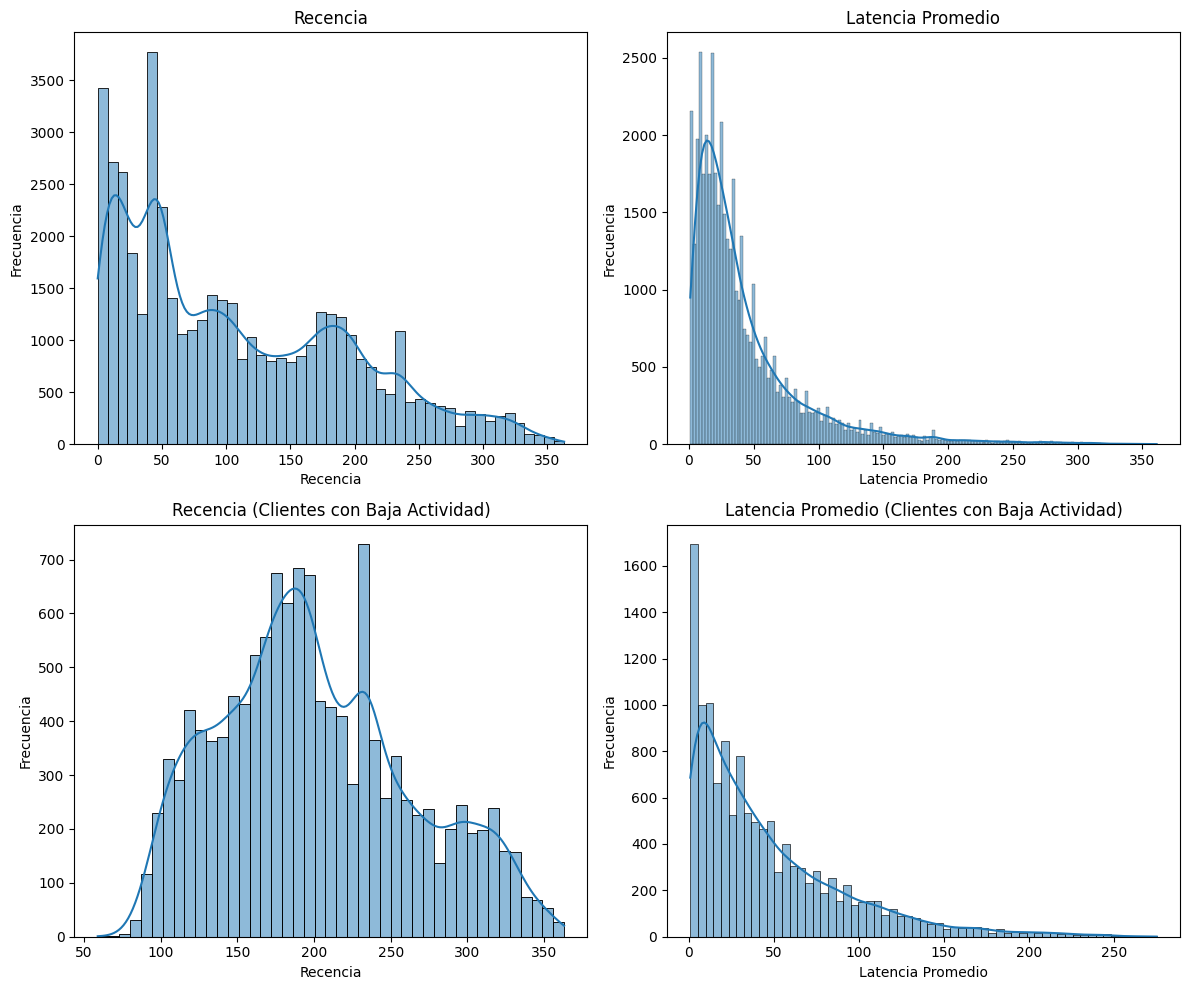

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Evitar sugerencias de código
import warnings
warnings.filterwarnings('ignore')

# Crear un gráfico con 4 paneles (2x2)
plt.figure(figsize=(12, 10))

# Panel 1: Distribución de Recencia
plt.subplot(2, 2, 1)
sns.histplot(output['recencia'], kde=True)
plt.title('Recencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

# Panel 2: Distribución de Latencia Promedio
plt.subplot(2, 2, 2)
sns.histplot(output['latencia_promedio'], kde=True)
plt.title('Latencia Promedio')
plt.xlabel('Latencia Promedio')
plt.ylabel('Frecuencia')

# Filtrar solo los clientes de baja actividad
low_activity_customers = output[output['categoria'] == 'clientes con baja actividad']

# Panel 3: Distribución de Recencia para Clientes con Baja Actividad
plt.subplot(2, 2, 3)
sns.histplot(low_activity_customers['recencia'], kde=True)
plt.title('Recencia (Clientes con Baja Actividad)')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

# Panel 4: Distribución de Latencia Promedio para Clientes con Baja Actividad
plt.subplot(2, 2, 4)
sns.histplot(low_activity_customers['latencia_promedio'], kde=True)
plt.title('Latencia Promedio (Clientes con Baja Actividad)')
plt.xlabel('Latencia Promedio')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

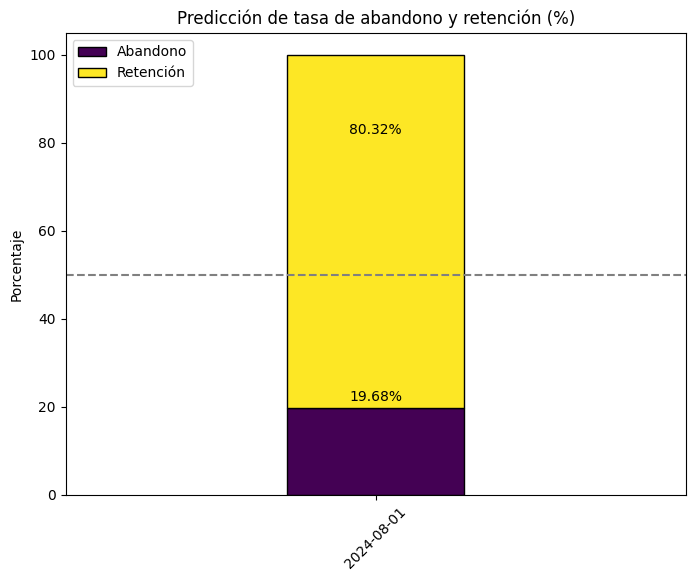

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calcular el porcentaje de clases 0 y 1 en la columna 'pred_abandono'
churn_rate_test = output['pred_abandono'].value_counts(normalize=True) * 100

# Crear un DataFrame con los datos de retención y abandono, poniendo el abandono primero
data = {
    'Abandono': [churn_rate_test[1]],
    'Retención': [churn_rate_test[0]]
}

df = pd.DataFrame(data)

# Definir el ancho de las barras
width = 0.2

# Crear un gráfico de barras apiladas
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), cmap='viridis', edgecolor='black', width=width)

# Agregar etiquetas a las barras con los porcentajes
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 1,
            str(round(i.get_height(), 2)) + '%', ha='center', va='bottom')

# Sumar un mes a la fecha del eje x
fecha_analisis = pd.to_datetime(output['fecha_analisis'].iloc[0])

# Personalizar el gráfico
plt.ylabel('Porcentaje')
plt.title(f'Predicción de tasa de abandono y retención (%)')
plt.legend(loc='upper left')
plt.xticks([0], 
           [(fecha_analisis + pd.DateOffset(months=1)).strftime('%Y-%m-%d')], 
           rotation=45)  # Etiqueta única para el eje x
plt.axhline(y=50, color='gray', linestyle='--')  # Línea punteada en 50%
plt.show()